# Reading the dataset

In [ ]:
# Importing the required library
import pandas as pd

In [ ]:
# Reading the dataset
data = pd.read_csv('/content/gender_classification.csv')

In [ ]:
# Checking top 5 rows of dataset
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
# Checking the shape of the dataset
data.shape

(5001, 8)

In [ ]:
# Class label count
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [ ]:
# percentage distribution
data['gender'].value_counts(normalize=True)

Female    0.5001
Male      0.4999
Name: gender, dtype: float64

# Defining input output features

In [ ]:
# Defining input (X) and output (y) features
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [ ]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True, random_state = 0)

In [ ]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((3500, 7), (1501, 7))

In [ ]:
# input patterns
X_train

array([[ 1. , 12.3,  5.8, ...,  1. ,  1. ,  0. ],
       [ 1. , 14.7,  6.3, ...,  1. ,  1. ,  0. ],
       [ 1. , 13.1,  6.1, ...,  0. ,  1. ,  1. ],
       ...,
       [ 1. , 14.3,  6.2, ...,  1. ,  0. ,  0. ],
       [ 0. , 12. ,  6.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.3,  5.7, ...,  0. ,  0. ,  0. ]])

# Initializing and training Adaptive Boosting Classifier

In [ ]:
# Defining the Adaptive Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()

AdaBoostClassifier()

In [ ]:
# train the classifier
classifier.fit(X_train, y_train)

# Predecting and Evaluating the classifier

In [ ]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Combining the actual and predicted values
pd.DataFrame(data={'Actual Gender': y_test, 'Predicted Gender': y_pred}).head()

,Actual Gender,Predicted Gender
0,Female,Female
1,Male,Male
2,Male,Male
3,Female,Female
4,Female,Female


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


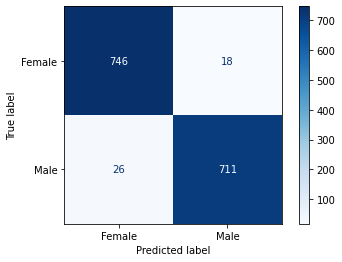

In [ ]:
# Confusuion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues')

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9706862091938707

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97       764
        Male       0.98      0.96      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

